In [1]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
analysis = scripts.Analysis()

In [4]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'o3',
                          'band05_wn_980_1100',
                          'P_50_T_250_min_1e-20_max_7.117e-20_ng_3_dlogN_0.426_0.426__P_1_T_250_ng_4',
                          'wgt_1_.9_.85_.7_.6_.5_.4',
                          'midlatitude_summer')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [5]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'o3',
                               'band05_wn_980_1100',
                               'P_50_T_250_min_1e-20_max_7.117e-20_ng_3_dlogN_0.426_0.426__P_1_T_250_ng_4',
                               'wgt_1_.9_.85_.7_.6_.5_.4',
                               'midlatitude_summer')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [6]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = list(range(1, 7 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [7]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [8]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [9]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [10]:
# print some input parameters

with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()
    
def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'tsfc', 
            'pressure_reference_high',
            'temperature_reference_high', 
            'pressure_reference_low', 
            'temperature_reference_low',
            'ighigh', 
            'ng', 
            'absth',
            'wgt']


def pattern_assign(name):
    return ''' 
    parameter .* :: .* ({} .* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/]+ {}[^,] [^/]+ / [^/]+ /)
    '''.format(name)


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results



    

print('\n\n'.join(get_input_params(c, innames())))

vstar = 980

nband = 120

nv = 1000

dv = 0.001

tsfc = 294.0

pressure_reference_high = 1.

temperature_reference_high = 250.

pressure_reference_low = 50.

temperature_reference_low = 250.

ighigh = 3

ngas = 6      

ng = 7

data absth(:, 1)
!     &    /2.000000e-22, 3.8470878e-22, 7.40004238e-22,
!     &     1.423430e-21, 1.10733E-20,   2.93308E-19,
!     &     2.31589E-17/

data absth(:, 2)
     &    /1.000e-20,  2.668e-20,  7.117e-20,
     &     1.899e-19,   2.633e-19,   3.652e-19,
     &     5.065e-19/

data wgt
     &     /  1.00, 0.90, 0.85,
     &     0.70, 0.60, 0.50, 0.40/


In [11]:
fig.display_hrefanchor()

In [12]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [13]:
table_dgdgs.display_hrefanchor()

In [14]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

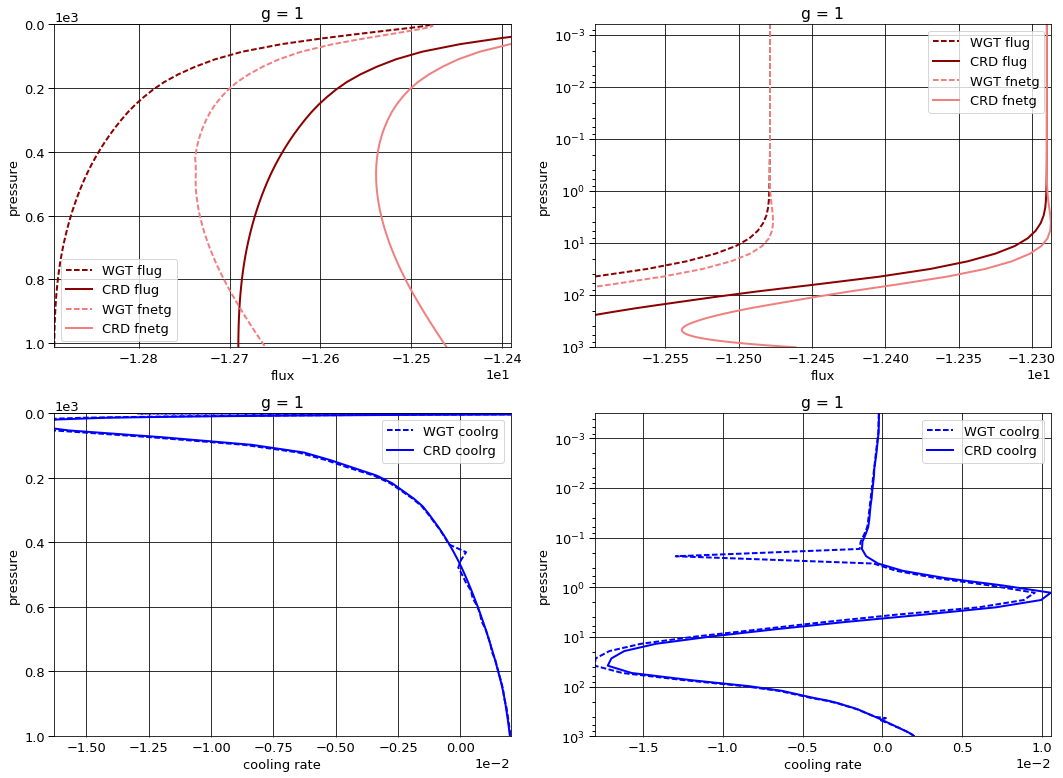

# Figure: flux, cooling rate. g-group 2

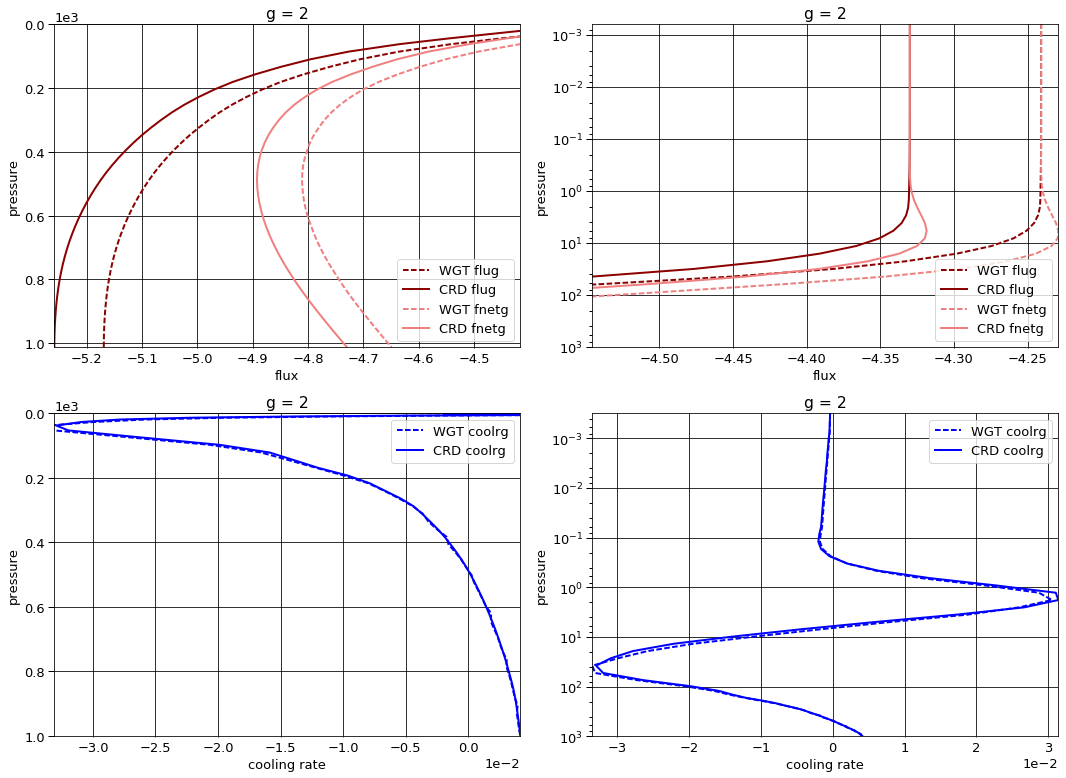

# Figure: flux, cooling rate. g-group 3

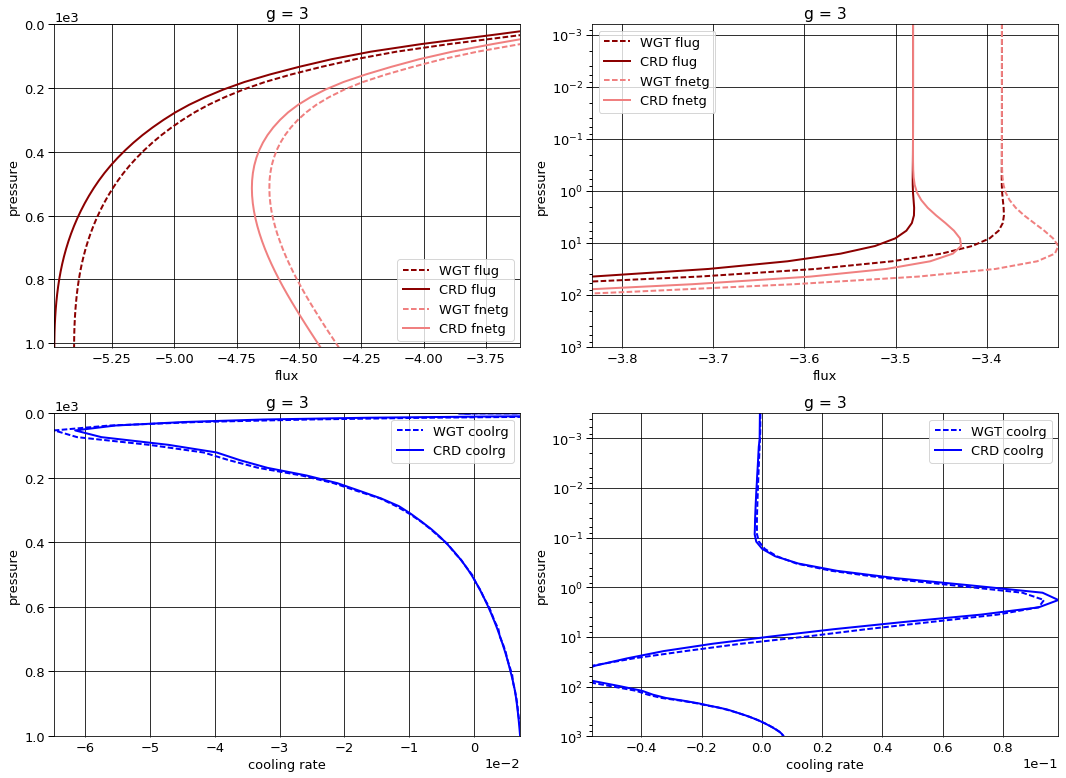

# Figure: flux, cooling rate. g-group 4

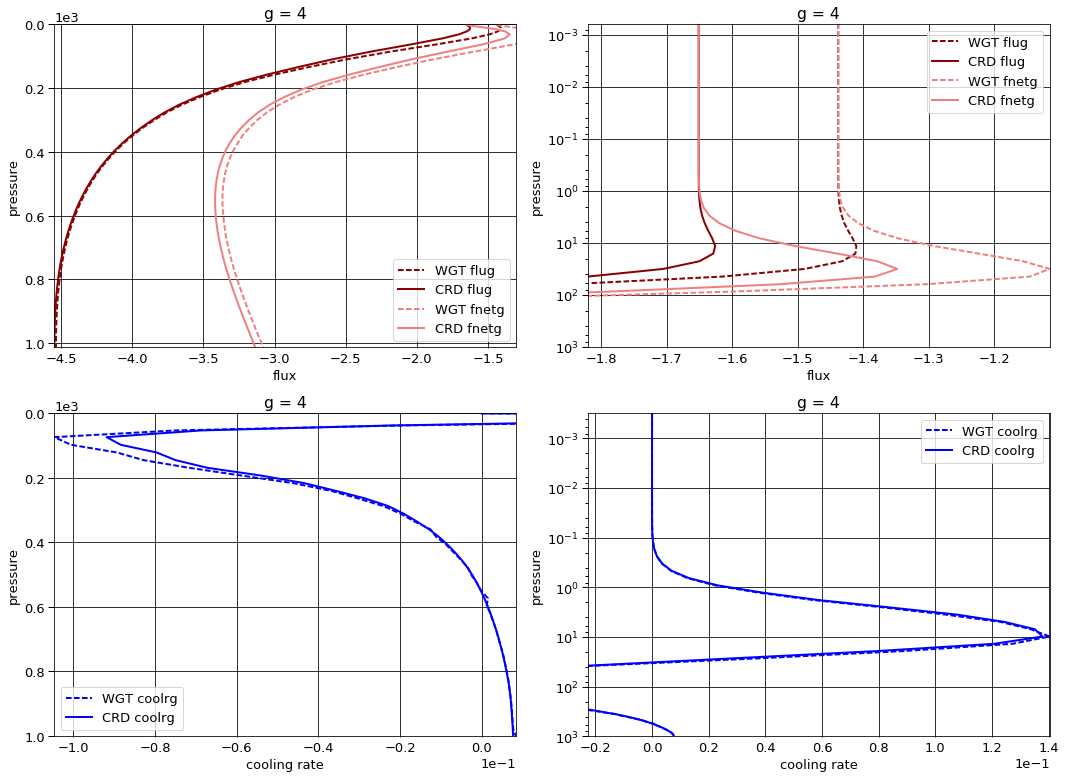

# Figure: flux, cooling rate. g-group 5

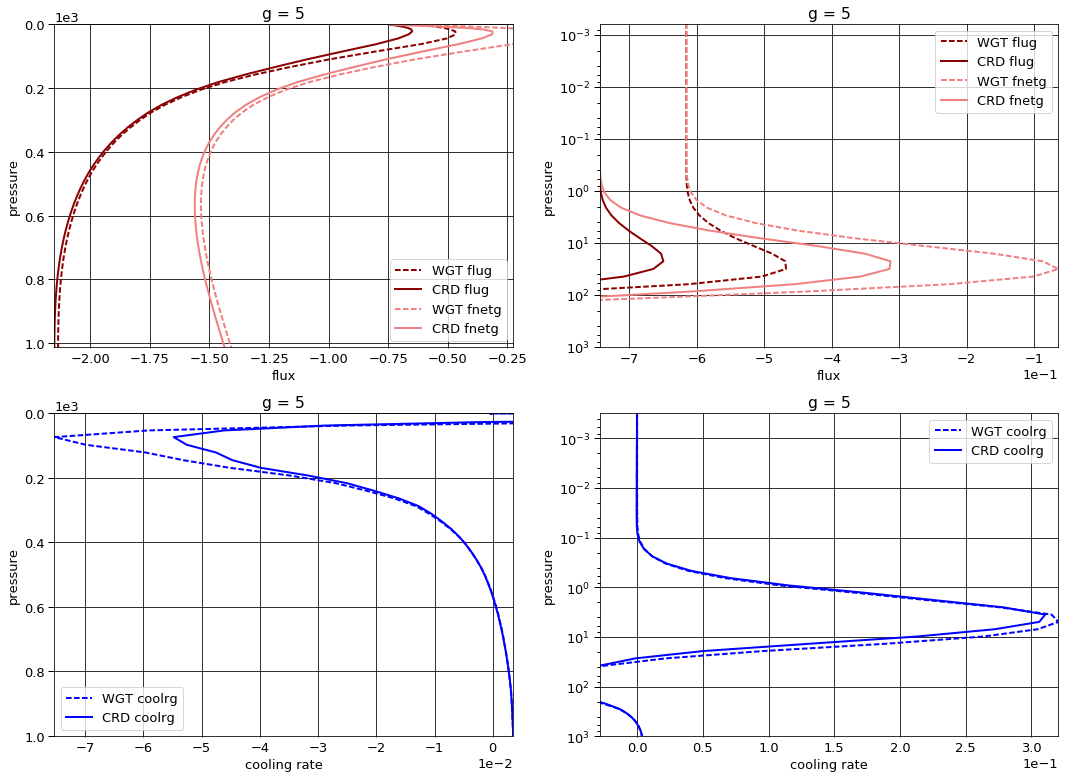

# Figure: flux, cooling rate. g-group 6

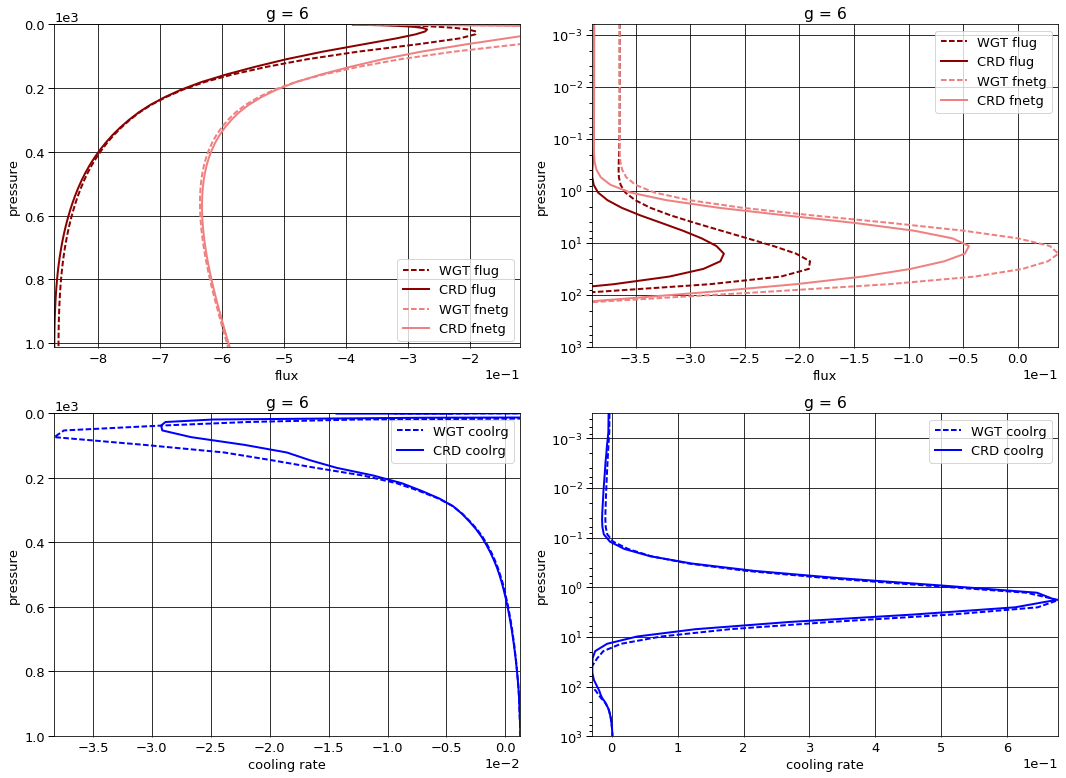

# Figure: flux, cooling rate. g-group 7

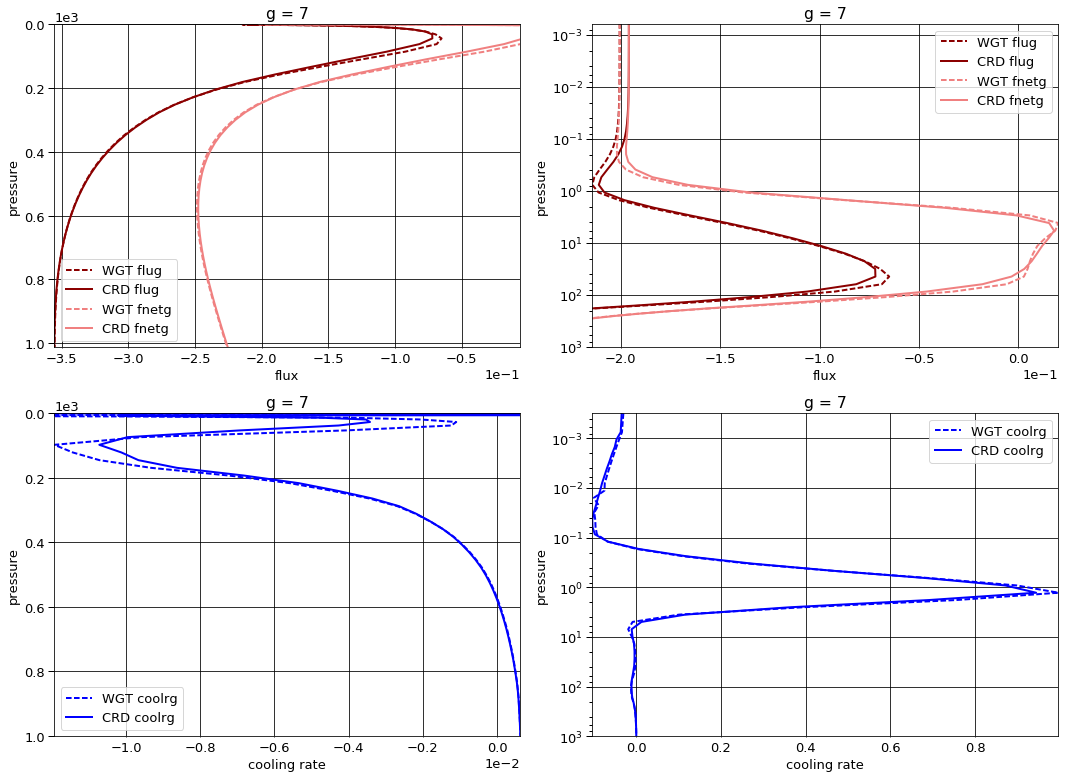

# Figure: flux, cooling rate. g-group total

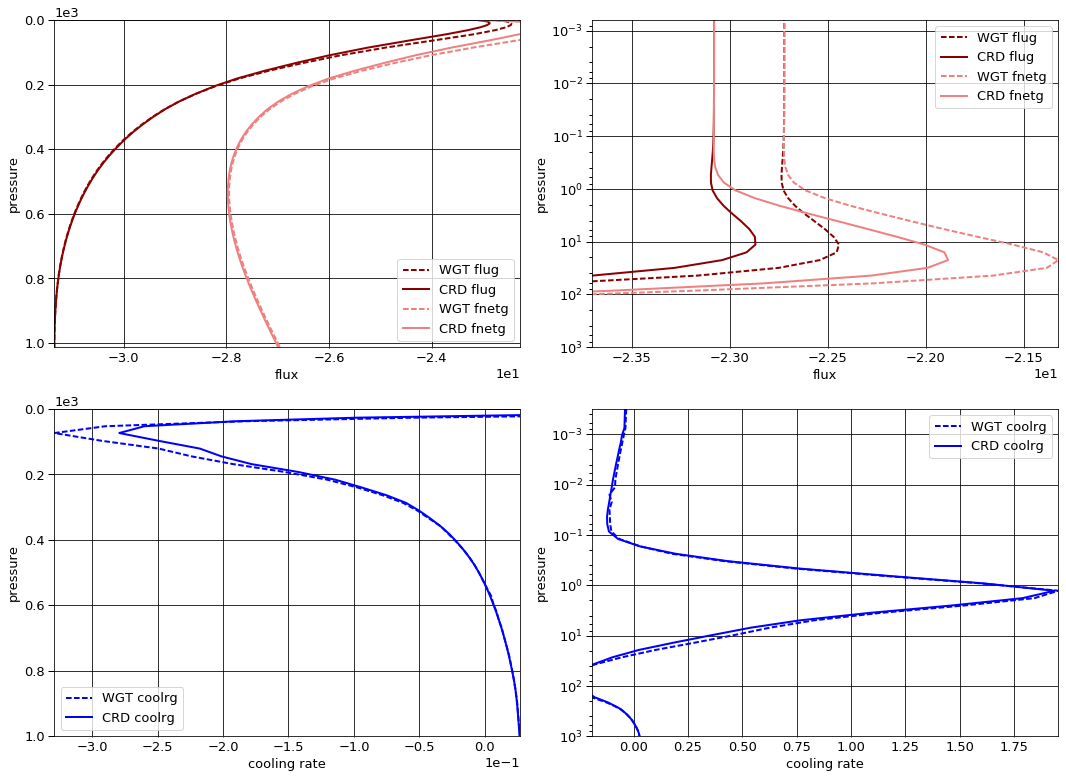

In [15]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [16]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0.0      1     -12.289739  0.000000 -12.289739
  1013.0   76    -12.690350  0.229315 -12.461035
2 0.0      1      -4.329974  0.000000  -4.329974
  1013.0   76     -5.258376  0.528945  -4.729431
3 0.0      1      -3.480814  0.000000  -3.480814
  1013.0   76     -5.480852  1.067621  -4.413232
4 0.0      1      -1.650943  0.000000  -1.650943
  1013.0   76     -4.547592  1.412451  -3.135140
5 0.0      1      -0.744210  0.000000  -0.744210
  1013.0   76     -2.150394  0.714177  -1.436217
6 0.0      1      -0.387991  0.000000  -0.387991
  1013.0   76     -0.871080  0.283188  -0.587892
7 0.0      1      -0.195921  0.000000  -0.195921
  1013.0   76     -0.355591  0.130155  -0.225436


WGT


flug      fldg      fnetg
g pressure level                                
1 0.0      1     -12.478616  0.000000 -12.478616
  1013.0   76    -12.892861  0.232395 -12.660467
2 0.0      1      -4.240831  0.000000  -4.240831
  1013.0   76     -5.169007  0.520014  -4.648993
3 0.0      1      -3.383358  0.000000  -3.383358
  1013.0   76     -5.401551  1.061367  -4.340184
4 0.0      1      -1.437923  0.000000  -1.437923
  1013.0   76     -4.536435  1.458424  -3.078011
5 0.0      1      -0.615663  0.000000  -0.615663
  1013.0   76     -2.134701  0.725627  -1.409074
6 0.0      1      -0.364517  0.000000  -0.364517
  1013.0   76     -0.864332  0.273880  -0.590451
7 0.0      1      -0.200545  0.000000  -0.200545
  1013.0   76     -0.355348  0.129422  -0.225926


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0.0      1     -0.188877  0.000000 -0.188877
  1013.0   76    -0.202511  0.003080 -0.199432
2 0.0      1      0.089143  0.000000  0.089143
  1013.0   76     0.089369 -0.008931  0.080439
3 0.0      1      0.097456  0.000000  0.097456
  1013.0   76     0.079302 -0.006254  0.073048
4 0.0      1      0.213020  0.000000  0.213020
  1013.0   76     0.011156  0.045973  0.057129
5 0.0      1      0.128546  0.000000  0.128546
  1013.0   76     0.015693  0.011450  0.027143
6 0.0      1      0.023474  0.000000  0.023474
  1013.0   76     0.006748 -0.009307 -0.002559
7 0.0      1     -0.004624  0.000000 -0.004624
  1013.0   76     0.000243 -0.000733 -0.000490

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000204
  1001.112500 75     0.001986
2 0.000312    1     -0.000371
  1001.112500 75     0.004161
3 0.000312    1     -0.000627
  1001.112500 75     0.007137
4 0.000312    1     -0.000010
  1001.112500 75     0.007754
5 0.000312    1     -0.000191
  1001.112500 75     0.003508
6 0.000312    1     -0.004518
  1001.112500 75     0.001271
7 0.000312    1     -0.033834
  1001.112500 75     0.000631


WGT


coolrg
g pressure    layer          
1 0.000312    1     -0.000220
  1001.112500 75     0.002011
2 0.000312    1     -0.000371
  1001.112500 75     0.004162
3 0.000312    1     -0.000468
  1001.112500 75     0.007111
4 0.000312    1     -0.000003
  1001.112500 75     0.008452
5 0.000312    1     -0.000055
  1001.112500 75     0.003495
6 0.000312    1     -0.003133
  1001.112500 75     0.001259
7 0.000312    1     -0.029841
  1001.112500 75     0.000632


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1     -1.622267e-05
  1001.112500 75     2.507890e-05
2 0.000312    1      2.403000e-08
  1001.112500 75     1.297400e-06
3 0.000312    1      1.589074e-04
  1001.112500 75    -2.576820e-05
4 0.000312    1      7.556907e-06
  1001.112500 75     6.982565e-04
5 0.000312    1      1.355526e-04
  1001.112500 75    -1.346170e-05
6 0.000312    1      1.384944e-03
  1001.112500 75    -1.187260e-05
7 0.000312    1      3.992553e-03
  1001.112500 75     3.821500e-07

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-23.079591,0.000000,-23.079591
1013.0,76,-31.354235,4.365852,-26.988383



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-22.721454,0.000000,-22.721454
1013.0,76,-31.354234,4.401131,-26.953105



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,3.581372e-01,0.000000,0.358137
1013.0,76,3.800000e-07,0.035279,0.035278


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.039754
1001.112500,75,0.026448



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.034091
1001.112500,75,0.027122



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.005663
1001.112500,75,0.000674


In [17]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.411200,0.402707
2,0.164858,0.168826
3,0.172275,0.175651
4,0.144683,0.144968
5,0.068083,0.068687
6,0.027567,0.027834
7,0.011333,0.011326


In [18]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')